#Initial settings


In [ ]:
#The necessary libraries are downloaded to make the yolo network work
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt
#The necessary libraries are imported
import cv2
from google.colab.patches import cv2_imshow
import torch
import numpy as np

#Mouth detection function

In [6]:
def mouth_detector(image):
  # The image is loaded
  imagen_1 = cv2.imread(image)
  #Dimensional readjustment
  # Desired size
  Size_Img = (640, 480)
  # Checking Size
  height, width, channels = imagen_1.shape

  if width != Size_Img[0] or height != Size_Img[1]:
    # Resize the image to the new size
      imagen_1 = cv2.resize(imagen_1, (Size_Img[0], Size_Img[1]))
  #Goes to grayscale
  gray = cv2.cvtColor(imagen_1, cv2.COLOR_RGB2GRAY)
  #Face Detection
  face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  # Draw rectangles around detected faces
  faces = face_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
  if len(faces) == 0:
      print("No face detected")
  else:
    for (x, y, w, h) in faces:
        cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 0, 0), 2)
        cropped_face = gray[y:y + h, x:x + w].copy()
        dimX, dimY = cropped_face.shape

        # Define the coordinates for the mouth cutout
        x_mouth = slice(int(dimX * 0.6), int(dimX * 0.95))
        y_mouth = slice(int(dimY * 0.2), int(dimY * 0.8))
        #Trimming the mouth and obtaining ROI
        ROI_mouth = cropped_face[x_mouth, y_mouth]

  #Apply the model and obtain features
  detect = model(ROI_mouth)
  info = detect.pandas().xyxy[0]
  cv2_imshow(np.squeeze((detect.render())))
  return(info)

#Function call

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-3 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 322 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


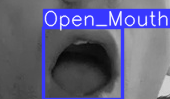

,xmin,ymin,xmax,ymax,confidence,class,name
0,43.498379,27.143528,122.755745,99.0,0.801837,0,Open_Mouth


In [7]:
#The model is loaded
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/model.pt', force_reload=True)
image = '/content/Open.png' #A Test image is loaded. Place the image you want to test
#The face detector is called
mouth_detector(image)